<a href="https://colab.research.google.com/github/maheshmani13/Peer-graded-Assignment-Getting-and-Cleaning-Data-Course-Project/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.1 Installing Pycaret

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [2]:
from pycaret.utils import version
version()

'3.3.0'

## 0.2 Loading dataset downloaded from UCI library (Frog dataset)

In [3]:
import pandas as pd

dataset = pd.read_csv('/content/Frogs_MFCCs.csv').iloc[:,:-1]

print(dataset.head())


   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3       1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4       1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_16  MFCCs_17  MFCCs_18  MFCCs_19  \
0 -0.150063 -0.171128  0.124676  ... -0.024017 -0.108351 -0.077623 -0.009568   
1 -0.222475 -0.207693  0.170883  ...  0.012022 -0.090974 -0.056510 -0.035303   
2 -0.242234 -0.219153  0.232538  ...  0.083536 -0.050691 -0.023590 -0.066722   
3 -0.194347 -0.098181  0.270375  ... -0.050224 -0.136009 -0.177037 -0.130498   
4 -0.265423 -0.172700  0.266434  ...  0.062837 -0.048885 -0.053074 -0.088550   

   MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus         

# ** 1. KMeans Clustering**




In [4]:
kmeans_dict ={
    'No_PreProcessing' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
     'Normalization' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
     'pca' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
     'transform' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
     'pca+transform' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
    'Removing_Collinearity' : {
        '3' : {},
        '4' : {},
        '5' : {}
    }
    ,
    'Polynomial_Features' :
        {
        '3' : {},
        '4' : {},
        '5' : {}
        }
}


## 1.1 No PrePrcoessing

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5173,4171.1741,1.1785,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5841,4862.5234,0.9753,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5730,4627.8458,0.9632,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

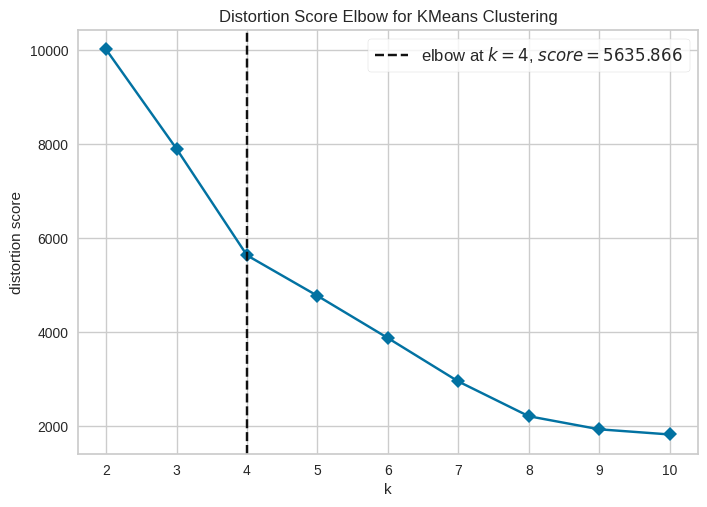

In [5]:
from pycaret.clustering import *

Kmeans_clustering = setup(dataset , session_id = 1 , verbose = False)
for i in range(3,6):
  model = create_model('kmeans', num_clusters=i )
  results = pull()
  kmeans_dict['No_PreProcessing'][str(i)]['Silhouette'] = results['Silhouette'][0]
  kmeans_dict['No_PreProcessing'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  kmeans_dict['No_PreProcessing'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]

plot_model(model, plot = 'elbow')

## 1.2 Using Normalization

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3636,1742.5535,1.4228,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3974,1544.7696,1.4280,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4466,1580.9532,1.5125,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

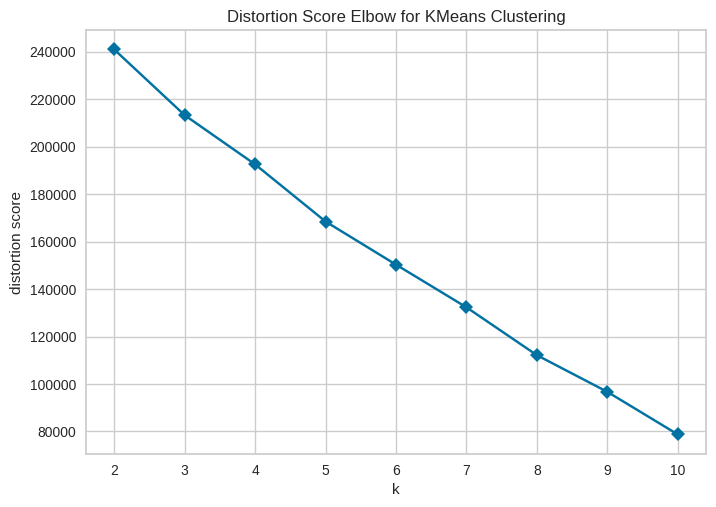

In [24]:
Kmeans_clustering = setup(dataset , session_id = 1, normalize=True  ,normalize_method = 'zscore' , verbose = False)

for i in range(3,6):
  model = create_model('kmeans', num_clusters=i )
  results = pull()
  kmeans_dict['Normalization'][str(i)]['Silhouette'] = results['Silhouette'][0]
  kmeans_dict['Normalization'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  kmeans_dict['Normalization'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]

plot_model(model, plot = 'elbow')

## 1.3 Removing Collinearity

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5230,5059.7179,1.2332,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5577,5019.6198,1.2206,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5828,4832.9376,1.1130,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

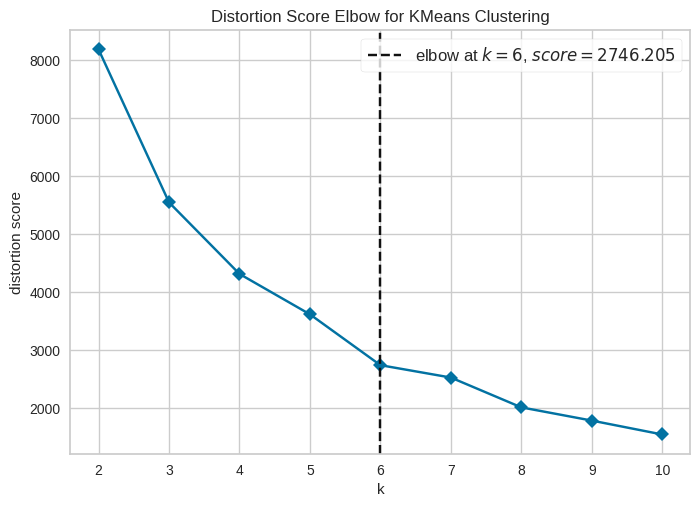

In [7]:
Kmeans_clustering = setup(dataset , session_id = 1, remove_multicollinearity=True , verbose = False)

for i in range(3,6):
  model = create_model('kmeans', num_clusters=i)
  results = pull()
  kmeans_dict['Removing_Collinearity'][str(i)]['Silhouette'] = results['Silhouette'][0]
  kmeans_dict['Removing_Collinearity'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  kmeans_dict['Removing_Collinearity'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]

plot_model(model, plot = 'elbow')

## 1.4 Using Polynomial_Featuresnomial Features

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4900,3407.4308,1.3445,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5134,3020.4687,1.2178,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5738,4089.2632,1.2211,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

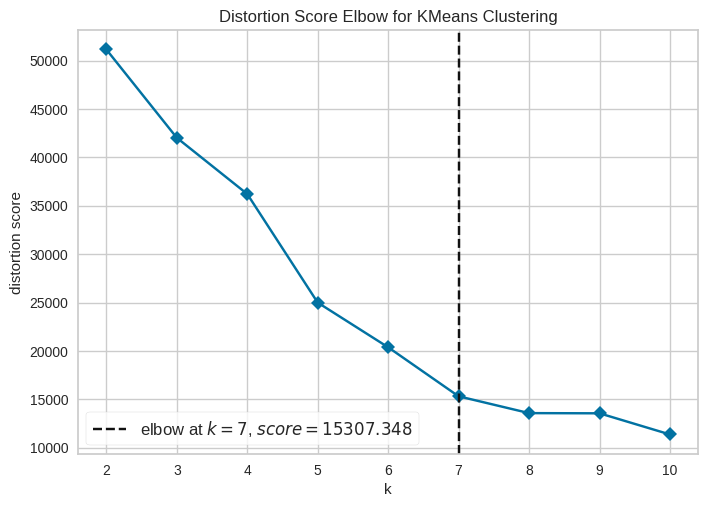

In [8]:
Kmeans_clustering = setup(dataset , session_id = 1,  polynomial_features=True,verbose = False)

for i in range(3,6):
  model = create_model('kmeans', num_clusters=i )
  results = pull()
  kmeans_dict['Polynomial_Features'][str(i)]['Silhouette'] = results['Silhouette'][0]
  kmeans_dict['Polynomial_Features'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  kmeans_dict['Polynomial_Features'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]

plot_model(model, plot = 'elbow')

## 1.5 Using PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5173,4171.1741,1.1785,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5841,4862.5234,0.9753,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5730,4627.8458,0.9632,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

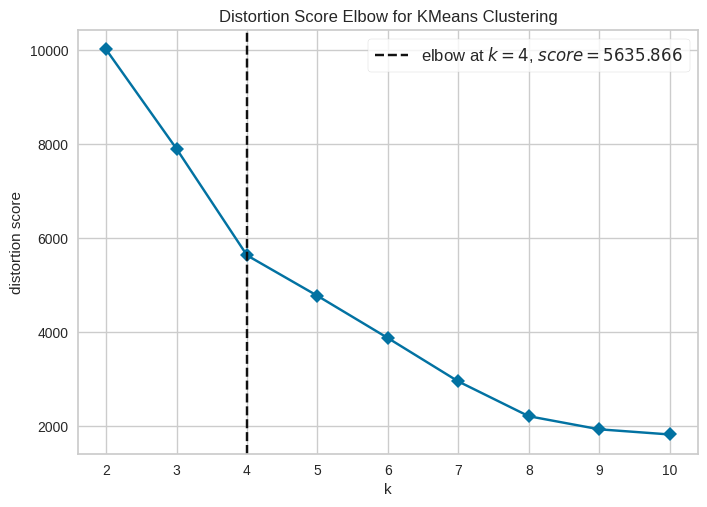

In [9]:
Kmeans_clustering = setup(dataset , session_id = 1, pca = True , pca_method ='linear', verbose = False)

for i in range(3,6):
  model = create_model('kmeans', num_clusters=i )
  results = pull()
  kmeans_dict['pca'][str(i)]['Silhouette'] = results['Silhouette'][0]
  kmeans_dict['pca'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  kmeans_dict['pca'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]

plot_model(model, plot = 'elbow')

## 1.6 Using Transformation

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9976,1678335.4134,0.3446,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9978,4262016.3718,0.2423,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9977,7493627.2061,0.2803,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

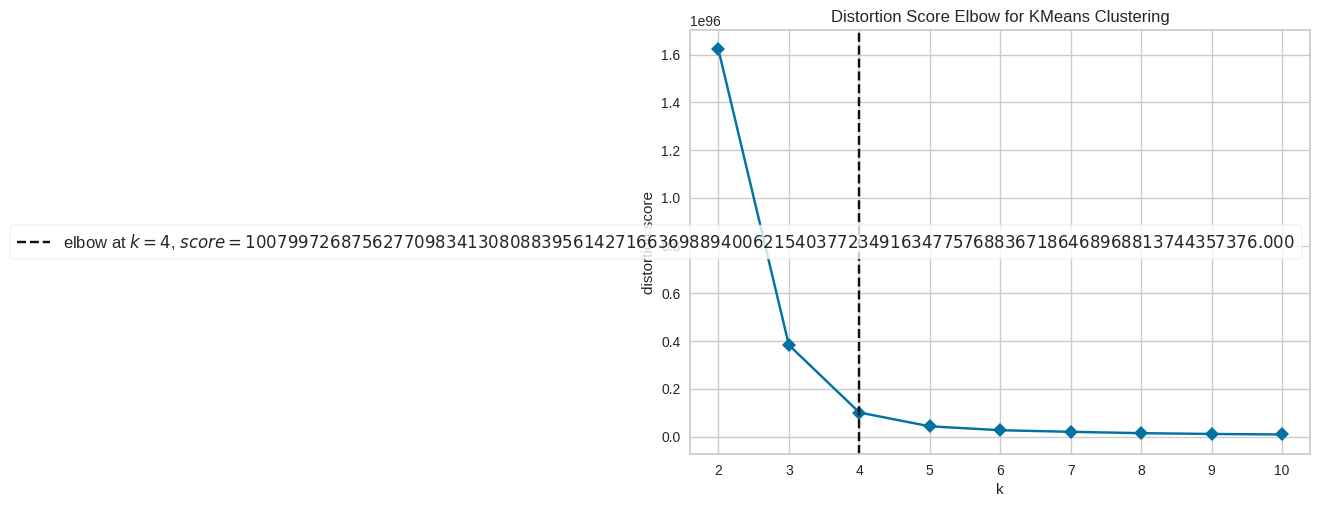

In [10]:
Kmeans_clustering = setup(dataset , session_id = 1,transformation = True ,   transformation_method = 'yeo-johnson', verbose = False)

for i in range(3,6):
  model = create_model('kmeans', num_clusters=i)
  results = pull()
  kmeans_dict['transform'][str(i)]['Silhouette'] = results['Silhouette'][0]
  kmeans_dict['transform'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  kmeans_dict['transform'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]

plot_model(model, plot = 'elbow')

## 1.7 Using PCA + Transformation

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9976,1678335.4134,0.3446,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9978,4262016.3718,0.2423,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9977,7493627.2061,0.2803,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

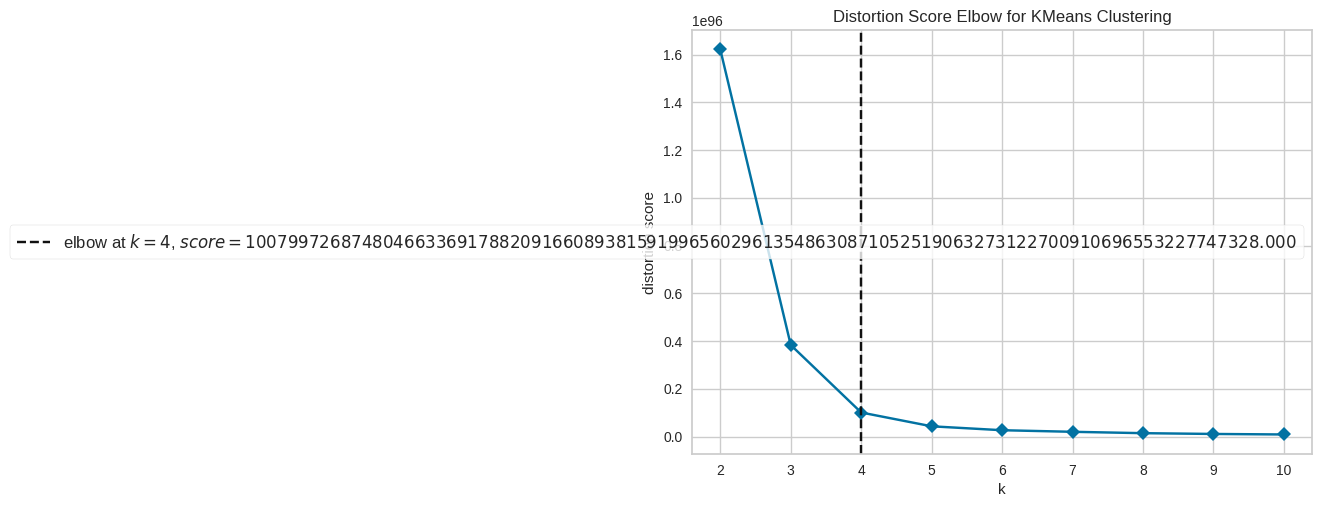

In [11]:
Kmeans_clustering = setup(dataset , session_id = 1,pca = True , pca_method = 'linear',
                                           transformation = True ,   transformation_method = 'yeo-johnson' ,verbose = False)
for i in range(3,6):
  model = create_model('kmeans', num_clusters=i )
  results = pull()
  kmeans_dict['pca+transform'][str(i)]['Silhouette'] = results['Silhouette'][0]
  kmeans_dict['pca+transform'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  kmeans_dict['pca+transform'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]

plot_model(model, plot = 'elbow')

## 1.8 Results Kmeans

In [12]:
data = kmeans_dict

table_data = []
for key, value in data.items():
    for k, v in value.items():
        row = {'Preprocessing Technique': key, 'Cluster Number': k}
        row.update(v)
        table_data.append(row)

from tabulate import tabulate

# Define column order
column_order = ['Preprocessing Technique', 'Cluster Number', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']

print(tabulate(table_data, headers="keys", tablefmt="grid"))


+---------------------------+------------------+--------------+---------------------+------------------+
| Preprocessing Technique   |   Cluster Number |   Silhouette |   Calinski-Harabasz |   Davies-Bouldin |
+===========================+==================+==============+=====================+==================+
| No_PreProcessing          |                3 |       0.5173 |      4171.17        |           1.1785 |
+---------------------------+------------------+--------------+---------------------+------------------+
| No_PreProcessing          |                4 |       0.5841 |      4862.52        |           0.9753 |
+---------------------------+------------------+--------------+---------------------+------------------+
| No_PreProcessing          |                5 |       0.573  |      4627.85        |           0.9632 |
+---------------------------+------------------+--------------+---------------------+------------------+
| Normalization             |                3 |       

# ** 2. Hierarchical Clustering**




In [13]:
Hierarchical_dict ={
    'No_PreProcessing' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
     'Normalization' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
     'pca' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
     'transform' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
     'pca+transform' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
    'Removing_Collinearity' : {
        '3' : {},
        '4' : {},
        '5' : {}
    }
    ,
    'Polynomial_Features' :
        {
        '3' : {},
        '4' : {},
        '5' : {}
        }
}


## 2.1 No PrePrcoessing

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5325,4534.4165,1.3420,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5840,4861.5953,0.9733,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6015,5001.6344,1.1786,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

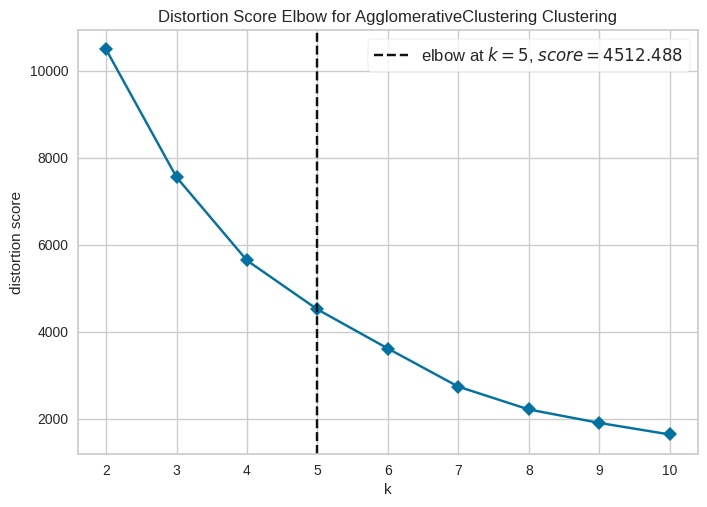

In [14]:
from pycaret.clustering import *

Hierarchical_clustering = setup(dataset , session_id = 1 , verbose = False)
for i in range(3,6):
  model = create_model('hclust', num_clusters=i )
  results = pull()
  Hierarchical_dict['No_PreProcessing'][str(i)]['Silhouette'] = results['Silhouette'][0]
  Hierarchical_dict['No_PreProcessing'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  Hierarchical_dict['No_PreProcessing'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]

plot_model(model, plot = 'elbow')

## 2.2 Using Normalization

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3696,1784.8171,1.9727,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4115,1677.2380,1.6373,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4295,1663.9698,1.2996,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

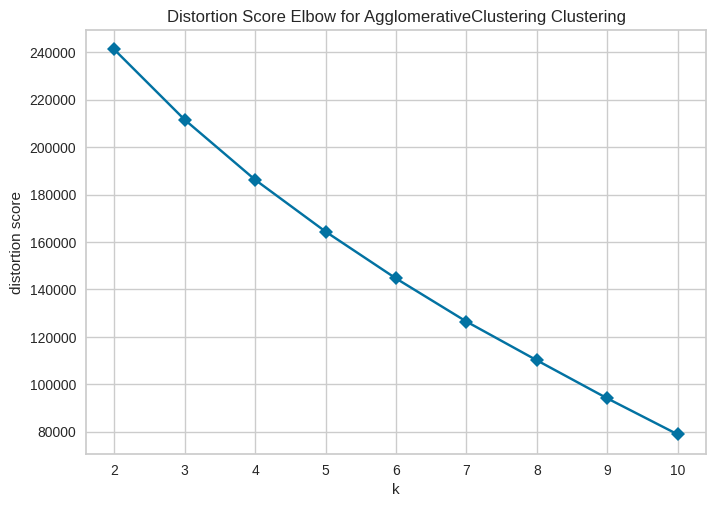

In [15]:
Hierarchical_clustering = setup(dataset , session_id = 1, normalize=True  ,normalize_method = 'zscore' , verbose = False)

for i in range(3,6):
  model = create_model('hclust', num_clusters=i )
  results = pull()
  Hierarchical_dict['Normalization'][str(i)]['Silhouette'] = results['Silhouette'][0]
  Hierarchical_dict['Normalization'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  Hierarchical_dict['Normalization'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]

plot_model(model, plot = 'elbow')

## 2.3 Removing Collinearity

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5191,5039.0542,1.2237,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5577,5019.6198,1.2206,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5917,5178.5869,1.0806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

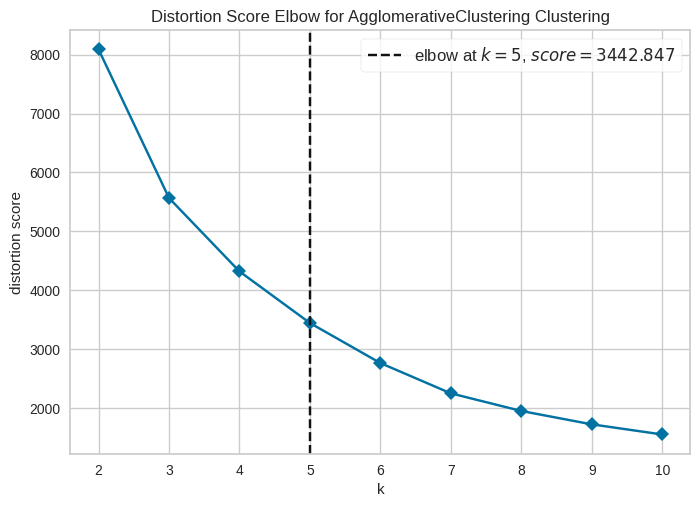

In [16]:
Hierarchical_clustering = setup(dataset , session_id = 1, remove_multicollinearity=True , verbose = False)

for i in range(3,6):
  model = create_model('hclust', num_clusters=i )
  results = pull()
  Hierarchical_dict['Removing_Collinearity'][str(i)]['Silhouette'] = results['Silhouette'][0]
  Hierarchical_dict['Removing_Collinearity'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  Hierarchical_dict['Removing_Collinearity'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]

plot_model(model, plot = 'elbow')

## 2.4 Using Polynomial_Featuresnomial Features

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5064,4021.4584,1.4005,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5476,3985.2217,1.3295,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5870,4183.4265,1.3032,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

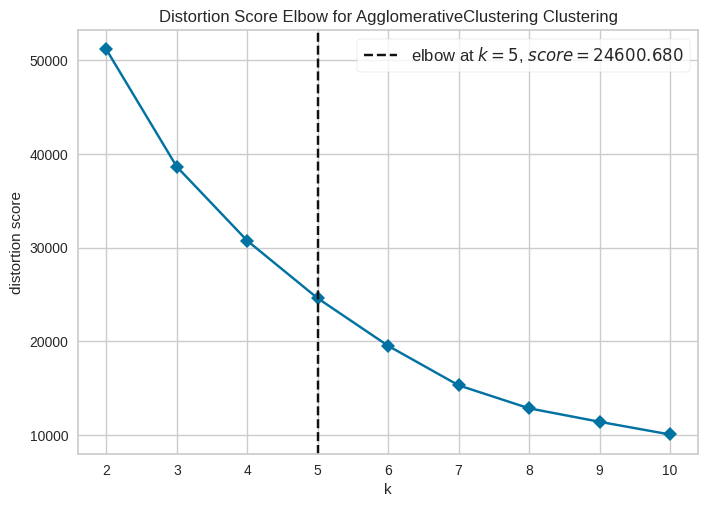

In [17]:
Hierarchical_clustering = setup(dataset , session_id = 1,  polynomial_features=True,verbose = False)

for i in range(3,6):
  model = create_model('hclust', num_clusters=i )
  results = pull()
  Hierarchical_dict['Polynomial_Features'][str(i)]['Silhouette'] = results['Silhouette'][0]
  Hierarchical_dict['Polynomial_Features'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  Hierarchical_dict['Polynomial_Features'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]

plot_model(model, plot = 'elbow')

## 2.5 Using PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5325,4534.4165,1.3420,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5840,4861.5953,0.9733,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6015,5001.6344,1.1786,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

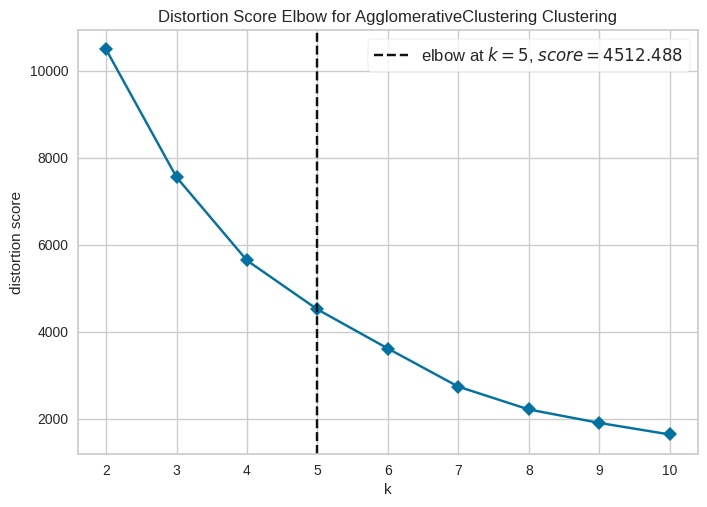

In [18]:
Hierarchical_clustering = setup(dataset , session_id = 1, pca = True , pca_method ='linear', verbose = False)

for i in range(3,6):
  model = create_model('hclust', num_clusters=i )
  results = pull()
  Hierarchical_dict['pca'][str(i)]['Silhouette'] = results['Silhouette'][0]
  Hierarchical_dict['pca'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  Hierarchical_dict['pca'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]

plot_model(model, plot = 'elbow')

## 2.6 Using Transformation

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9976,1678335.4134,0.3446,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9978,4105518.0878,0.2224,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9977,7493627.2061,0.2803,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

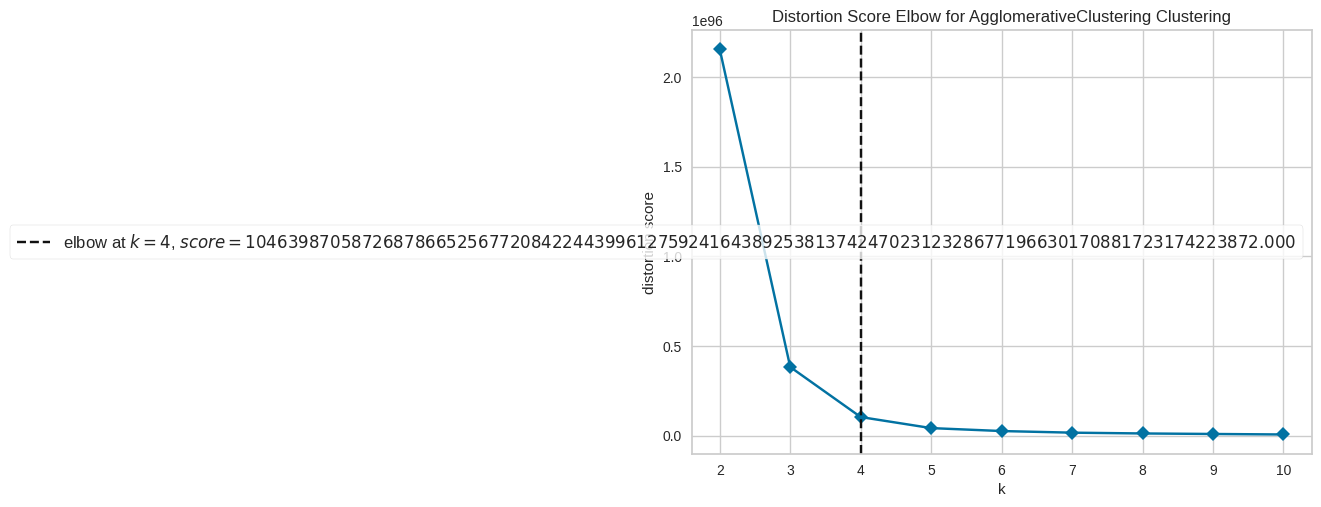

In [19]:
Hierarchical_clustering = setup(dataset , session_id = 1,transformation = True ,   transformation_method = 'yeo-johnson', verbose = False)

for i in range(3,6):
  model = create_model('hclust', num_clusters=i )
  results = pull()
  Hierarchical_dict['transform'][str(i)]['Silhouette'] = results['Silhouette'][0]
  Hierarchical_dict['transform'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  Hierarchical_dict['transform'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]

plot_model(model, plot = 'elbow')

## 2.7 Using PCA + Transformation

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9976,1678335.4134,0.3446,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9978,4105518.0878,0.2224,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9977,7493627.2061,0.2803,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

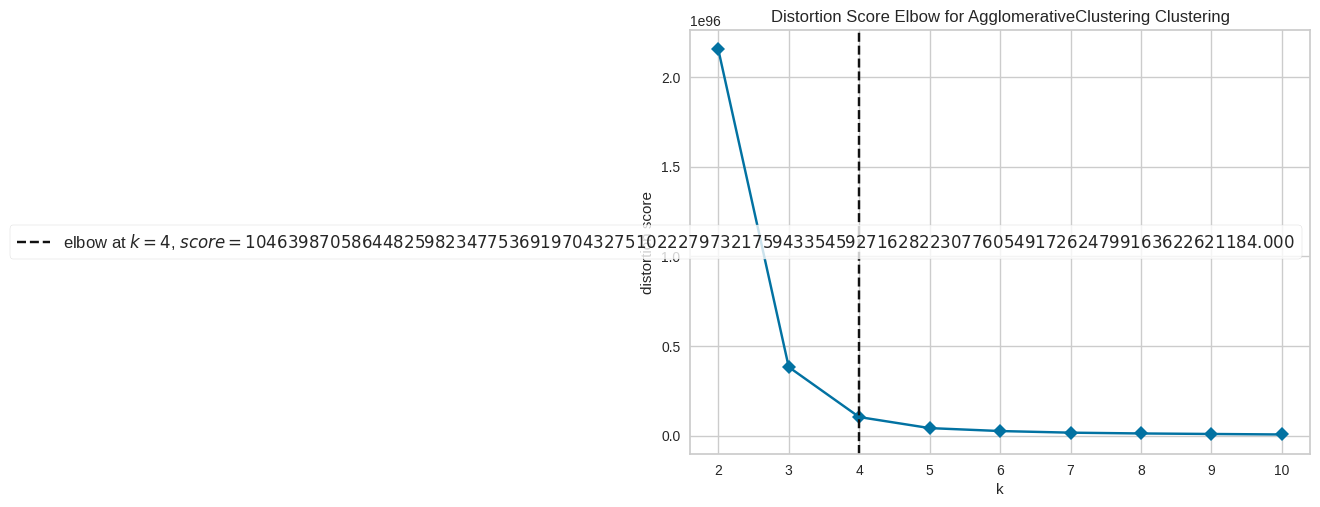

In [20]:
Hierarchical_clustering = setup(dataset , session_id = 1,pca = True , pca_method = 'linear',
                                           transformation = True ,   transformation_method = 'yeo-johnson' ,verbose = False)
for i in range(3,6):
  model = create_model('hclust', num_clusters=i )
  results = pull()
  Hierarchical_dict['pca+transform'][str(i)]['Silhouette'] = results['Silhouette'][0]
  Hierarchical_dict['pca+transform'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  Hierarchical_dict['pca+transform'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]

plot_model(model, plot = 'elbow')

## 2.8 Results Hierarchical

In [21]:
data = Hierarchical_dict

table_data = []
for key, value in data.items():
    for k, v in value.items():
        row = {'Preprocessing Technique': key, 'Cluster Number': k}
        row.update(v)
        table_data.append(row)

from tabulate import tabulate

# Define column order
column_order = ['Preprocessing Technique', 'Cluster Number', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']

print(tabulate(table_data, headers="keys", tablefmt="grid"))


+---------------------------+------------------+--------------+---------------------+------------------+
| Preprocessing Technique   |   Cluster Number |   Silhouette |   Calinski-Harabasz |   Davies-Bouldin |
+===========================+==================+==============+=====================+==================+
| No_PreProcessing          |                3 |       0.5325 |      4534.42        |           1.342  |
+---------------------------+------------------+--------------+---------------------+------------------+
| No_PreProcessing          |                4 |       0.584  |      4861.6         |           0.9733 |
+---------------------------+------------------+--------------+---------------------+------------------+
| No_PreProcessing          |                5 |       0.6015 |      5001.63        |           1.1786 |
+---------------------------+------------------+--------------+---------------------+------------------+
| Normalization             |                3 |       

# ** 3. Mean_Shift Clustering**




In [29]:
Mean_Shift_dict ={
    'No_PreProcessing' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
     'Normalization' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
     'pca' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
     'transform' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
     'pca+transform' : {
        '3' : {},
        '4' : {},
        '5' : {}
    },
    'Removing_Collinearity' : {
        '3' : {},
        '4' : {},
        '5' : {}
    }
    ,
    'Polynomial_Features' :
        {
        '3' : {},
        '4' : {},
        '5' : {}
        }
}


## 3.1 No PrePrcoessing

In [30]:
from pycaret.clustering import *

Mean_Shift_clustering = setup(dataset , session_id = 1 , verbose = False)
for i in range(3,6):
  model = create_model('meanshift', num_clusters = i )
  results = pull()
  Mean_Shift_dict['No_PreProcessing'][str(i)]['Silhouette'] = results['Silhouette'][0]
  Mean_Shift_dict['No_PreProcessing'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  Mean_Shift_dict['No_PreProcessing'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6716,5197.9321,0.6086,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6716,5197.9321,0.6086,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6716,5197.9321,0.6086,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## 3.2 Using Normalization

In [32]:
Mean_Shift_clusteringMean_Shift = setup(dataset , session_id = 1, normalize=True  ,normalize_method = 'zscore' , verbose = False)

for i in range(3,6):
  model = create_model('meanshift', num_clusters = i )
  results = pull()
  Mean_Shift_dict['Normalization'][str(i)]['Silhouette'] = results['Silhouette'][0]
  Mean_Shift_dict['Normalization'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  Mean_Shift_dict['Normalization'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3654,348.3472,1.1617,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3654,348.3472,1.1617,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3654,348.3472,1.1617,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## 3.3 Removing Collinearity

In [33]:
Mean_Shift_clustering = setup(dataset , session_id = 1, remove_multicollinearity=True , verbose = False)

for i in range(3,6):
  model = create_model('meanshift', num_clusters = i)
  results = pull()
  Mean_Shift_dict['Removing_Collinearity'][str(i)]['Silhouette'] = results['Silhouette'][0]
  Mean_Shift_dict['Removing_Collinearity'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  Mean_Shift_dict['Removing_Collinearity'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6703,5708.1169,0.6337,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6703,5708.1169,0.6337,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6703,5708.1169,0.6337,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## 3.4 Using Polynomial_Featuresnomial Features

In [ ]:
Mean_Shift_clustering = setup(dataset , session_id = 1,  polynomial_features=True,verbose = False)

for i in range(3,6):
  model = create_model('meanshift', num_clusters = i )
  results = pull()
  Mean_Shift_dict['Polynomial_Features'][str(i)]['Silhouette'] = results['Silhouette'][0]
  Mean_Shift_dict['Polynomial_Features'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  Mean_Shift_dict['Polynomial_Features'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]



,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:36:34
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Clusters
Estimator,. . . . . . . . . . . . . . . . . .,Mean Shift Clustering


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## 3.5 Using PCA

In [35]:
Mean_Shift_clustering = setup(dataset , session_id = 1, pca = True , pca_method ='linear', verbose = False)

for i in range(3,6):
  model = create_model('meanshift', num_clusters = i )
  results = pull()
  Mean_Shift_dict['pca'][str(i)]['Silhouette'] = results['Silhouette'][0]
  Mean_Shift_dict['pca'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  Mean_Shift_dict['pca'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6716,5197.9321,0.6086,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6716,5197.9321,0.6086,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6716,5197.9321,0.6086,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## 3.6 Using Transformation

In [36]:
Mean_Shift_clustering = setup(dataset , session_id = 1,transformation = True ,   transformation_method = 'yeo-johnson', verbose = False)

for i in range(3,6):
  model = create_model('meanshift', num_clusters = i)
  results = pull()
  Mean_Shift_dict['transform'][str(i)]['Silhouette'] = results['Silhouette'][0]
  Mean_Shift_dict['transform'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  Mean_Shift_dict['transform'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9968,16562963.4146,0.3591,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9968,16562963.4146,0.3591,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9968,16562963.4146,0.3591,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## 3.7 Using PCA + Transformation

In [37]:
Mean_Shift_clustering = setup(dataset , session_id = 1,pca = True , pca_method = 'linear',
                                           transformation = True ,   transformation_method = 'yeo-johnson' ,verbose = False)
for i in range(3,6):
  model = create_model('meanshift', num_clusters = i )
  results = pull()
  Mean_Shift_dict['pca+transform'][str(i)]['Silhouette'] = results['Silhouette'][0]
  Mean_Shift_dict['pca+transform'][str(i)]['Calinski-Harabasz'] = results['Calinski-Harabasz'][0]
  Mean_Shift_dict['pca+transform'][str(i)]['Davies-Bouldin'] = results['Davies-Bouldin'][0]


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9968,16562963.4146,0.3591,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9968,16562963.4146,0.3591,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9968,16562963.4146,0.3591,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## 3.8 Results Mean_Shift

In [ ]:
data = Mean_Shift_dict

table_data = []
for key, value in data.items():
    for k, v in value.items():
        row = {'Preprocessing Technique': key, 'Cluster Number': k}
        row.update(v)
        table_data.append(row)

from tabulate import tabulate

# Define column order
column_order = ['Preprocessing Technique', 'Cluster Number', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']

print(tabulate(table_data, headers="keys", tablefmt="grid"))
